# Проверка окружения

Выберите в качестве среды выполнения серве с _GPU_, для этого выберите Runtime -> _Change Runtime Type_ -> _GPU_

С помощью `!nvidia-smi` можно проверить, доступна ли видеокарта для вычислений (в коллабе это Tesla T4 / V100 / A100)

In [ ]:
!nvidia-smi

Sat Oct  7 21:42:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Установка

Что нужно сделать:
1. Обновить gcc в Colab
1. Установить Conda
1. Установить стабильную версию библиотеки RAPIDS', в том числе внешние библиотеки:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuSignal
  1. BlazingSQL
  1. xgboost
1. Скопировать RAPIDS .so файлы в текущую директорию для работы RAPIDS в колабе.

In [1]:
# здесь происходит скачивание скриптов для установки RAPIDS-Colab и проверки GPU
# важно, чтобы в сообщении не было ошибки, иначе далее могут быть проблемы с установкой
!git clone https://github.com/apat1n/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Клонирование в «rapidsai-csp-utils»...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 396 (delta 98), reused 81 (delta 61), pack-reused 257
Получение объектов: 100% (396/396), 107.04 КиБ | 498.00 КиБ/с, готово.
Определение изменений: 100% (196/196), готово.
***********************************************************************
Woo! Your instance has the right kind of GPU, a NVIDIA GeForce GTX 1050!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
# здесь происходит обновление окружения и перезагрузка ноутбука (может выскочить сообщение, что ядро умерло, но это нормально)
# не запускайте следующую ячейку, пока не выполнится эта
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntu-toolchain-r/test/ubuntu/ jammy main'
Description:
Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntu-toolchain-r-ubuntu-test.gpg with fingerprint 60C317803A41BA51845E371A1E9377A2BA9EF27F
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/rep

In [1]:
# здесь мы установим condacolab, после чего снова перезапустится ноутбук
# следующую ячейку можно запускать после завершения этой
import condacolab
condacolab.install()

RuntimeError: This module must ONLY run as part of a Colab notebook!

In [ ]:
# ура! мы почти настроили окружение
# если возникла ошибка, попробуйте еще раз запустить данную ячейку
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# установим теперь rapids (может занять 15 минут)
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Выходные данные были обрезаны до нескольких последних строк (5000).










libuv-1.44.2         | 805 KB    |            |   0% 

















nodejs-20.5.1        | 16.2 MB   |            |   0% 


















async-timeout-4.0.3  | 11 KB     |            |   0% 



















 ... (more hidden) ...



traitlets-5.11.2     | 106 KB    | #5         |  15% 


fastapi-0.103.2      | 55 KB     | ##9        |  29% 




google-cloud-storage | 83 KB     | #9         |  19% 

pthread-stubs-0.4    | 5 KB      | ########## | 100% 
libcufile-dev-1.4.0. | 1.6 MB    |            |   1%





aws-c-mqtt-0.8.14    | 150 KB    | #          |  11% 



traitlets-5.11.2     | 106 KB    | ########## | 100% 







pyppeteer-1.0.2      | 63 KB     | ##5        |  26% 








proj-9.2.1           | 2.8 MB    |            |   1% 


fastapi-0.103.2      | 55 KB     | ########## | 100% 


fastapi-0.103.2      | 55 KB     | ########## | 100% 

pthread-stubs-0.4    | 5 KB      | ########## | 100%

# cuDF & cuML

Теперь можно запускать код!

Здесь мы рассмотрим простые примеры с обработкой данных полностью на GPU

#[cuDF](https://github.com/rapidsai/cudf)#

Загрузим датасет в память GPU и выполним простые вычисления

На GPU выполняется все: от разбора CSV до расчета процента чаевых и вычисления среднего значения по группам.

In [ ]:
import cudf
import io, requests

# скачаем датасет с github
url="https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

# прочитаем csv файл с диска
tips_df = cudf.read_csv(io.StringIO(content))
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100
print(tips_df)

# посчитаем и отобразим средний чек
print(tips_df.groupby('size').tip_percentage.mean())

     total_bill   tip     sex smoker   day    time  size  tip_percentage
0         16.99  1.01  Female     No   Sun  Dinner     2        5.944673
1         10.34  1.66    Male     No   Sun  Dinner     3       16.054159
2         21.01  3.50    Male     No   Sun  Dinner     3       16.658734
3         23.68  3.31    Male     No   Sun  Dinner     2       13.978041
4         24.59  3.61  Female     No   Sun  Dinner     4       14.680765
..          ...   ...     ...    ...   ...     ...   ...             ...
239       29.03  5.92    Male     No   Sat  Dinner     3       20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2        7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2        8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2        9.820426
243       18.78  3.00  Female     No  Thur  Dinner     2       15.974441

[244 rows x 8 columns]
size
6    15.622920
1    21.729202
4    14.594901
3    15.215685
2    16.571919
5    14.149549
Name:

#[cuML](https://github.com/rapidsai/cuml)#

Попробуем провести кластеризацию данных

Как и раньше, все выполняется на GPU

In [ ]:
import cuml

# создадим датафрейм на GPU
df_float = cudf.DataFrame()
df_float['0'] = [1.0, 2.0, 5.0]
df_float['1'] = [4.0, 2.0, 1.0]
df_float['2'] = [4.0, 2.0, 1.0]

# запустим алгоритм кластеризации
dbscan_float = cuml.DBSCAN(eps=1.0, min_samples=1)
dbscan_float.fit(df_float)

print(dbscan_float.labels_)

0    0
1    1
2    2
dtype: int32


# Merlin

In [ ]:
# если возникает ошибка NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: bokeh, cudf, dask-cuda, dask-cudf, dask-sql, datashader, geopandas, holoviews, mapclassify, panel, xarray


In [ ]:
!pip install -q cffi==1.16.0
!pip install -q nvtx dask_cuda==23.4.0 nvtabular==23.8.0
!pip install -q keras==2.12.0 merlin-models==23.8.0 merlin-core==23.8.0 merlin-systems==23.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.5/284.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.1/957.1 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies 

In [ ]:
import numpy as np
import os

import nvtabular as nvt
from nvtabular import ops
from merlin.core.utils import download_file
from merlin.schema.tags import Tags
import merlin.models.tf as mm
import shutil

from os import path
import gc
import glob

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
df_lib = get_lib()

INPUT_DATA_DIR = "./movielens-25m-dataset/ml-25m/"
WORKING_DIR = "/content/processed"
if not os.path.exists(WORKING_DIR):
    os.makedirs(WORKING_DIR)

random_seed = 42
np.random.seed(random_seed)

/usr/local/lib/python3.10/site-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


## Скачаем данные

In [ ]:
download_file(
    "http://files.grouplens.org/datasets/movielens/ml-25m.zip",
    os.path.join(INPUT_DATA_DIR, "ml-25m.zip"),
)

downloading ml-25m.zip: 262MB [00:05, 45.2MB/s]                           
unzipping files: 100%|██████████| 8/8 [00:12<00:00,  1.51s/files]


## Обработаем данные

In [ ]:
# movies: id, title, genres
movies = df_lib.read_csv(os.path.join(INPUT_DATA_DIR, "ml-25m/movies.csv"))

# преобразуем genres в список: id, genre_list
movies["genres"] = movies["genres"].str.split("|")
movies.to_parquet(os.path.join(WORKING_DIR, "movies_converted.parquet"))

tags = df_lib.read_csv(os.path.join(INPUT_DATA_DIR, "ml-25m/genome-scores.csv"))

# закодированные теги: - movie id | gene-1 | gene-2 | ...
tags = tags.pivot("movieId", "tagId")["relevance"]
tags.columns = ["gene-"+str(v) for v in tags.columns]
tags = tags.reset_index()

tags.to_parquet(os.path.join(WORKING_DIR, "tags_converted.parquet"))

### Разделим датасет на train/valid

In [ ]:
# ratings: userid, movieid, rating, timestamp
ratings = df_lib.read_csv(os.path.join(INPUT_DATA_DIR, "ml-25m/ratings.csv"))
ratings = ratings.sort_values('timestamp').head(10_000_000)

user_counts = ratings.groupby('userId').count()['movieId']
filtered_user_ids = user_counts[user_counts > 3].index
ratings = ratings[ratings['userId'].isin(filtered_user_ids)]

# возьмем 3 последних взаимодействия в качестве тестовой выборки, остальное – тренировочной
train = ratings.sort_values('timestamp').groupby('userId').head(-3)
valid = ratings.sort_values('timestamp').groupby('userId').tail(3)

train.to_parquet(os.path.join(WORKING_DIR, "train.parquet"))
valid.to_parquet(os.path.join(WORKING_DIR, "valid.parquet"))

## ETL

In [ ]:
USER_ID = "userId"
ITEM_ID = "movieId"
RATING = "rating"

# смержим жанровые признаки из movies датафрейма
joined = [USER_ID, ITEM_ID] >> ops.JoinExternal(movies, on=[ITEM_ID])
# закодируем категориальные признаки
cat_features = joined >> ops.Categorify(dtype="int32")
# выберем колонку 'rating' в качестве лейбла
label = nvt.ColumnSelector([RATING])

# target-encoding для movieId колонки
# для кодирование усредняется рейтинг для каждого фильма с сглаживанием и k-fold валидацией
cats = nvt.ColumnSelector([ITEM_ID])
te_features = cats >> ops.TargetEncoding(label, kfold=5, p_smooth=20)
te_features_norm = te_features >> ops.Normalize() >> ops.TagAsItemFeatures()

# count encode `userId`
# Count encoding creates a new features, which is the count of items of each user
count_logop_feat = (
    [USER_ID]
    >> ops.JoinGroupby(cont_cols=[ITEM_ID], stats=["count"])
    >> ops.LogOp()
    >> ops.TagAsUserFeatures()
)

# tag ids
feats_item = cat_features[ITEM_ID] >> ops.TagAsItemID()
feats_user = cat_features[USER_ID] >> ops.TagAsUserID()

# count encode genres
# feats_genres = cat_features["genres"] >> ops.ValueCount() >> ops.TagAsItemFeatures()

# genome scores (a standard array of n values across all movies)
# genome = [ITEM_ID] >> ops.JoinExternal(tags, on=[ITEM_ID])
# cont_features = ["gene-" + str(v) for v in range(1, 1129)]

# TODO: use tags (user generated tags for each movie)

# transforming and tagging targets
feats_target = (
    nvt.ColumnSelector(["rating"])
    >> ops.LambdaOp(lambda col: (col > 3).astype("int32"))
    >> ops.AddMetadata(tags=["binary_classification", "target"])
    >> nvt.ops.Rename(name="rating_binary")
)
target_orig = (
    ["rating"]
    >> ops.LambdaOp(lambda col: col.astype("float32"))
    >> ops.AddMetadata(tags=["regression", "target"])
)

# соединим все вместе
# genome и genre вызывают ошибку out of memory
dag = feats_item + feats_user
dag += te_features_norm + count_logop_feat
dag += target_orig + feats_target

workflow = nvt.Workflow(dag)

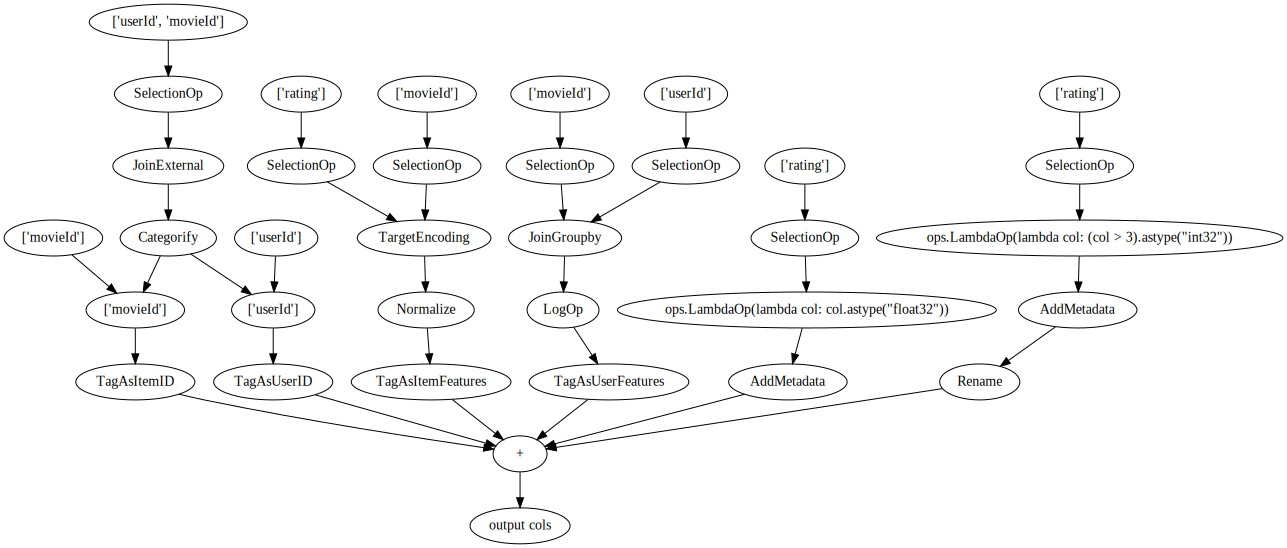

In [ ]:
dag.graph

### Запуск пайплайна

In [ ]:
# dataset is like the Dataset class in Pytorch
train_dataset = nvt.Dataset([os.path.join(WORKING_DIR, "train.parquet")])
valid_dataset = nvt.Dataset([os.path.join(WORKING_DIR, "valid.parquet")])

In [ ]:
# Make sure we have a clean output path
if path.exists(os.path.join(WORKING_DIR, "train")):
    shutil.rmtree(os.path.join(WORKING_DIR, "train"))
if path.exists(os.path.join(WORKING_DIR, "valid")):
    shutil.rmtree(os.path.join(WORKING_DIR, "valid"))

In [ ]:
%%time
workflow.fit(train_dataset)

CPU times: user 2.63 s, sys: 665 ms, total: 3.3 s
Wall time: 3.26 s


In [ ]:
%%time
# Add "write_hugectr_keyset=True" to "to_parquet"
# if using this ETL Notebook for training with HugeCTR
# workflow.transform(train_dataset).to_parquet(
#     output_path=os.path.join(WORKING_DIR, "train"),
#     shuffle=nvt.io.Shuffle.PER_PARTITION,
#     cats=["userId", "movieId", "genres"],
#     labels=["rating"],
#     dtypes=dict_dtypes,
# )
workflow.transform(train_dataset).to_parquet(
    output_path=os.path.join(WORKING_DIR, "train")
)
workflow.transform(valid_dataset).to_parquet(
    output_path=os.path.join(WORKING_DIR, "valid"),
)

CPU times: user 1.45 s, sys: 560 ms, total: 2.01 s
Wall time: 2 s


### Workflow

In [ ]:
workflow.save(os.path.join(WORKING_DIR, "workflow"))

In [ ]:
!printf '\n >>> directory contents\n'
!find /content/processed/workflow
!cat /content/processed/workflow/metadata.json


 >>> directory contents
/content/processed/workflow
/content/processed/workflow/categories
/content/processed/workflow/categories/cat_stats.movieId.parquet
/content/processed/workflow/categories/cat_stats.movieId.parquet/part.0.parquet
/content/processed/workflow/categories/unique.movieId.parquet
/content/processed/workflow/categories/unique.userId.parquet
/content/processed/workflow/categories/unique.title.parquet
/content/processed/workflow/categories/cat_stats.__fold___movieId.parquet
/content/processed/workflow/categories/cat_stats.__fold___movieId.parquet/part.0.parquet
/content/processed/workflow/categories/unique.genres.parquet
/content/processed/workflow/categories/cat_stats.userId.parquet
/content/processed/workflow/categories/cat_stats.userId.parquet/part.0.parquet
/content/processed/workflow/workflow.pkl
/content/processed/workflow/metadata.json
{"versions": {"nvtabular": "23.08.00", "cudf": "23.08.00", "python": "3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]"}, "gener

### Training Directory Contents

In [ ]:
!printf '\n >>> directory contents\n'
!find /content/processed/train/
!printf '\n>>>_metadata.json\n'
!cat /content/processed/train/_metadata.json
!printf "\n>>>protobuf schema\n"
!cat /content/processed/train/schema.pbtxt
!printf '\n>>>file list\n'
!cat /content/processed/train/_file_list.txt


 >>> directory contents
/content/processed/train/
/content/processed/train/schema.pbtxt
/content/processed/train/_metadata
/content/processed/train/_file_list.txt
/content/processed/train/.merlin
/content/processed/train/.merlin/schema.json
/content/processed/train/_metadata.json
/content/processed/train/part_0.parquet

>>>_metadata.json
{"file_stats": [{"file_name": "part_0.parquet", "num_rows": 9768217}], "cats": [], "conts": [], "labels": []}
>>>protobuf schema
feature {
  name: "movieId"
  type: INT
  int_domain {
    name: "movieId"
    max: 8636
    is_categorical: true
  }
  annotation {
    tag: "item"
    tag: "id"
    tag: "categorical"
    extra_metadata {
      type_url: "type.googleapis.com/google.protobuf.Struct"
      value: "\nG\n\017embedding_sizes\0224*2\n\030\n\013cardinality\022\t\021\000\000\000\000\200\336\300@\n\026\n\tdimension\022\t\021\000\000\000\000\000\000p@\n\034\n\017dtype_item_size\022\t\021\000\000\000\000\000\000@@\n\033\n\016freq_threshold\022\t\021\

# Merlin-models

[I'm basing this from this notebook.](https://github.com/NVIDIA-Merlin/Merlin/blob/main/examples/Building-and-deploying-multi-stage-RecSys/01-Building-Recommender-Systems-with-Merlin.ipynb)

![Process Flow](https://github.com/NVIDIA-Merlin/Merlin/raw/de67daa16e24a8d0df5e960529b09ace63dc0734/examples/images/fourstages.png)

We'll be going with training a retrieval and then a ranking model for two-stage inference. A retrieval model is responsible for getting a subset of item candidates. In Movielens-25M, 56000 isn't much, but in other use cases where the items can number in the millions, it is **critical** to use a retrieval model first. It is designed to have a simpler and faster architecture, where the embeddings can be used in an approximate nearest neighbor setup. The ranking model, on the other hand, is a more complex model, which is responsible for ranking the item subset.

## Training a Retrieval Model with Two-Tower Model

To learn more about the Two-tower model you can visit [05-Retrieval-Model.ipynb](https://github.com/NVIDIA-Merlin/models/blob/main/examples/05-Retrieval-Model.ipynb) from Nvidia.


![](https://raw.githubusercontent.com/NVIDIA-Merlin/models/96fcccedd43cbdf470fe3322ea3978a9c82242d5/examples/images/TwoTower.png)

In [ ]:
train_processed = nvt.Dataset(os.path.join(WORKING_DIR, "train", "*.parquet"))
valid_processed = nvt.Dataset(os.path.join(WORKING_DIR, "valid", "*.parquet"))

# features
schema = train_processed.schema
schema

,name,tags,dtype,is_list,is_ragged,properties.cat_path,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.max_size,properties.freq_threshold,properties.num_buckets,properties.domain.min,properties.domain.max,properties.domain.name
0,movieId,"(Tags.ITEM, Tags.ID, Tags.CATEGORICAL)","DType(name='int32', element_type=<ElementType....",False,False,.//categories/unique.movieId.parquet,8637.0,256.0,0.0,0.0,NaN,0.0,8636.0,movieId
1,userId,"(Tags.USER, Tags.ID, Tags.CATEGORICAL)","DType(name='int32', element_type=<ElementType....",False,False,.//categories/unique.userId.parquet,77259.0,512.0,0.0,0.0,NaN,0.0,77258.0,userId
2,TE_movieId_rating,"(Tags.CONTINUOUS, Tags.ITEM)","DType(name='float64', element_type=<ElementTyp...",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,userId_count,"(Tags.CONTINUOUS, Tags.USER)","DType(name='float32', element_type=<ElementTyp...",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rating,"(Tags.TARGET, Tags.REGRESSION)","DType(name='float32', element_type=<ElementTyp...",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,rating_binary,"(Tags.TARGET, Tags.BINARY_CLASSIFICATION)","DType(name='int32', element_type=<ElementType....",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# обучим двухбашенную модель (DSSM)
model = mm.TwoTowerModel(
    schema,
    query_tower=mm.MLPBlock([128, 64], no_activation_last_layer=True),
    samplers=[mm.InBatchSampler()],
    embedding_options=mm.EmbeddingOptions(infer_embedding_sizes=True),
)

In [ ]:
model.compile(optimizer="adam", run_eagerly=False, metrics=[mm.RecallAt(10), mm.NDCGAt(10)])
model.fit(train_processed, validation_data=valid_processed, batch_size=4096, epochs=3)

Epoch 1/3


The sampler InBatchSampler returned no samples for this batch.


2384/2385 [============================>.] - ETA: 0s - loss: 7.8663 - recall_at_10: 0.0106 - ndcg_at_10: 0.0055 - regularization_loss: 0.0000e+00 - loss_batch: 7.8663

The sampler InBatchSampler returned no samples for this batch.


2385/2385 [==============================] - 102s 41ms/step - loss: 7.8666 - recall_at_10: 0.0106 - ndcg_at_10: 0.0055 - regularization_loss: 0.0000e+00 - loss_batch: 7.8669 - val_loss: 7.9559 - val_recall_at_10: 0.0126 - val_ndcg_at_10: 0.0066 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 7.9141
Epoch 2/3
2385/2385 [==============================] - 97s 40ms/step - loss: 7.6349 - recall_at_10: 0.0255 - ndcg_at_10: 0.0131 - regularization_loss: 0.0000e+00 - loss_batch: 7.6351 - val_loss: 8.0027 - val_recall_at_10: 0.0173 - val_ndcg_at_10: 0.0090 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 8.6009
Epoch 3/3
2385/2385 [==============================] - 96s 40ms/step - loss: 7.5376 - recall_at_10: 0.0338 - ndcg_at_10: 0.0175 - regularization_loss: 0.0000e+00 - loss_batch: 7.5378 - val_loss: 7.8799 - val_recall_at_10: 0.0222 - val_ndcg_at_10: 0.0116 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 8.1260


In [ ]:
from merlin.models.utils.example_utils import save_results

# сохраним модель
save_results("TwoTower", model, './two_tower_model')

In [ ]:
metrics = model.evaluate(valid_processed, batch_size=4096, return_dict=True)
metrics

57/57 [==============================] - 2s 28ms/step - loss: 8.3360 - recall_at_10: 0.0109 - ndcg_at_10: 0.0062 - regularization_loss: 0.0000e+00 - loss_batch: 8.3309


{'loss': 8.336007118225098,
 'recall_at_10': 0.01338838879019022,
 'ndcg_at_10': 0.007305480539798737,
 'regularization_loss': 0.0,
 'loss_batch': 8.126047134399414}

## Сохранение модели генерации кандидатов
So far we have trained and evaluated our Retrieval model. Now, the next step is to deploy our model and generate top-K recommendations given a user (query). We can efficiently serve our model by indexing the trained item embeddings into an Approximate Nearest Neighbors (ANN) engine. Basically, for a given user query vector, that is generated passing the user features into user tower of retrieval model, we do an ANN search query to find the ids of nearby item vectors, and at serve time, we score user embeddings over all indexed top-K item embeddings within the ANN engine.

In doing so, we need to export

- user (query) tower
- item and user features
- item embeddings

### Сохранение кодировщика для пользователя (запроса)

Для этого мы сохраним tensofflow модель, которая может строить эмбеддинг пользователя по набору его признаков

In [ ]:
query_tower = model.retrieval_block.query_block()
query_tower.save("query_tower")

INFO:tensorflow:Assets written to: query_tower/assets


INFO:tensorflow:Assets written to: query_tower/assets


## Сохранение признаков пользователей

`unique_rows_by_features` позволяет извлечь полученные признаки пользователей и объектов в виде cuDF датафреймов. Для пользователей используется `Tags.USER`, для объектов – `Tags.ITEM`.

In [ ]:
from merlin.models.utils.dataset import unique_rows_by_features

user_features = (
    unique_rows_by_features(train_processed, Tags.USER, Tags.USER_ID).compute().reset_index(drop=True)
)
user_features.head()

,userId,userId_count
0,39310,4.094345
1,30414,4.442651
2,28446,4.532599
3,32242,4.369448
4,30560,4.442651


In [ ]:
# save to disk
user_features.to_parquet("user_features.parquet")
user_features.shape

(77256, 2)

### Сохранение признаков объектов

In [ ]:
item_features = (
    unique_rows_by_features(train_processed, Tags.ITEM, Tags.ITEM_ID).compute().reset_index(drop=True)
)
# save to disk
item_features.to_parquet("item_features.parquet")
item_features.head()

,movieId,TE_movieId_rating
0,59,0.203802
1,26,1.007510
2,114,0.775259
3,45,-0.192519
4,94,0.383289


### Сохранение эмбеддингов

In [ ]:
import merlin.io.dataset as merlin_dataset

In [ ]:
item_features_dataset = merlin_dataset.Dataset(item_features, schema=schema)
# this produces an error (typing -- I'm not sure if it's pandas or dask or anything else)
item_embs = model.item_embeddings(item_features_dataset, batch_size=1024)
item_embs_df = item_embs.compute(scheduler="synchronous")
item_embs_df

INFO:tensorflow:Assets written to: /tmp/tmp0uys9azg/assets


INFO:tensorflow:Assets written to: /tmp/tmp0uys9azg/assets


,movieId,TE_movieId_rating,0,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,61,62,63
0,59,0.203802,0.397867,0.261254,-1.628554,1.430109,-0.276217,0.681379,0.201130,-0.671925,...,-0.715243,1.038452,-0.371238,0.208765,-0.215702,0.585132,0.861473,0.284599,0.012140,0.511347
1,26,1.007510,0.561894,0.209098,-1.820644,1.382146,-0.377606,0.603576,0.119727,-0.732350,...,-0.743416,0.962922,-0.212476,0.138761,-0.311586,0.364942,0.807752,0.493090,0.039530,0.521217
2,114,0.775259,0.573477,0.006213,-1.979699,1.028236,-0.180187,0.623569,-0.144503,-0.120190,...,-0.431150,0.448466,-0.331594,-0.506197,-0.226381,0.529110,0.799523,0.502711,0.322570,0.033706
3,45,-0.192519,0.451718,0.272815,-1.497386,1.425625,-0.684344,0.476032,0.496485,-1.011956,...,-0.872828,1.049148,-0.175735,-0.034626,-0.043516,0.537800,0.997670,0.105275,0.506898,0.543773
4,94,0.383289,0.425429,0.348105,-1.275222,1.379906,-0.403720,0.856288,0.228449,-0.511967,...,-0.751854,1.068235,-0.110740,-0.195612,-0.060902,0.530209,0.924540,0.393654,-0.215216,0.612646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,7755,0.246203,-0.401649,0.907906,-1.516356,-0.764459,-0.765725,-4.760075,1.397550,1.587012,...,1.025801,-1.768873,-0.674667,0.421670,-1.633630,-8.101631,-3.422319,-0.233158,0.009613,-0.824320
8630,8351,-0.150004,-0.148993,0.509874,-1.185040,-0.854119,-0.585193,-4.697505,1.164844,1.548552,...,1.226319,-1.554854,-0.527143,-0.090533,-1.672409,-7.939270,-3.402529,-0.296965,-0.359648,-0.763507
8631,8636,-0.010105,-0.016527,-0.681091,-1.474427,-0.697384,0.072100,-2.391456,-0.051564,1.725599,...,1.036381,-1.033371,-0.267143,0.172552,-1.684219,-3.961010,-1.319252,0.854268,0.418079,-0.767783
8632,8623,-0.010105,-0.040217,-0.195257,-1.412385,0.037109,-0.075979,-0.349708,-0.334329,0.990003,...,0.242646,-0.233624,-0.370498,0.687467,-0.913547,-0.813324,0.246584,0.921201,0.683701,-0.520203


In [ ]:
# select only embedding columns
item_embeddings = item_embs_df.iloc[:, 2:]
# save to disk
item_embeddings.to_parquet("item_embeddings.parquet")
item_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.397867,0.261254,-1.628554,1.430109,-0.276217,0.681379,0.201130,-0.671925,0.647501,-0.399008,...,-0.715243,1.038452,-0.371238,0.208765,-0.215702,0.585132,0.861473,0.284599,0.012140,0.511347
1,0.561894,0.209098,-1.820644,1.382146,-0.377606,0.603576,0.119727,-0.732350,0.727139,-0.147678,...,-0.743416,0.962922,-0.212476,0.138761,-0.311586,0.364942,0.807752,0.493090,0.039530,0.521217
2,0.573477,0.006213,-1.979699,1.028236,-0.180187,0.623569,-0.144503,-0.120190,0.794865,-0.321198,...,-0.431150,0.448466,-0.331594,-0.506197,-0.226381,0.529110,0.799523,0.502711,0.322570,0.033706
3,0.451718,0.272815,-1.497386,1.425625,-0.684344,0.476032,0.496485,-1.011956,0.703191,-0.211214,...,-0.872828,1.049148,-0.175735,-0.034626,-0.043516,0.537800,0.997670,0.105275,0.506898,0.543773
4,0.425429,0.348105,-1.275222,1.379906,-0.403720,0.856288,0.228449,-0.511967,0.382743,-0.638075,...,-0.751854,1.068235,-0.110740,-0.195612,-0.060902,0.530209,0.924540,0.393654,-0.215216,0.612646


# Ранжирующая модель

![](https://github.com/NVIDIA/DeepLearningExamples/raw/master/PyTorch/Recommendation/DLRM/notebooks/DLRM_architecture.png)

In [ ]:
import tensorflow as tf

BATCH_SIZE = 1024

In [ ]:
target_column = schema.select_by_tag(Tags.BINARY_CLASSIFICATION).column_names[0]
target_column

'rating_binary'

In [ ]:
model = mm.DLRMModel(
    schema,
    embedding_dim=64,
    bottom_block=mm.MLPBlock([128, 64]),
    top_block=mm.MLPBlock([128, 64, 32]),
    prediction_tasks=mm.BinaryClassificationTask(target_column),
)

In [ ]:
%%time
model.compile("adam", run_eagerly=False, metrics=[tf.keras.metrics.AUC()])
model.fit(train_processed, validation_data=train_processed, batch_size=BATCH_SIZE, epochs=3)

Epoch 1/3
9540/9540 [==============================] - 180s 18ms/step - loss: 0.5274 - auc: 0.8045 - regularization_loss: 0.0000e+00 - loss_batch: 0.5274 - val_loss: 0.4584 - val_auc: 0.8613 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 0.4142
Epoch 2/3
9540/9540 [==============================] - 234s 24ms/step - loss: 0.4480 - auc: 0.8667 - regularization_loss: 0.0000e+00 - loss_batch: 0.4480 - val_loss: 0.3637 - val_auc: 0.9241 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 0.3514
Epoch 3/3
9540/9540 [==============================] - 200s 21ms/step - loss: 0.3676 - auc: 0.9129 - regularization_loss: 0.0000e+00 - loss_batch: 0.3676 - val_loss: 0.2994 - val_auc: 0.9510 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 0.2711
CPU times: user 8min 59s, sys: 31.2 s, total: 9min 31s
Wall time: 10min 14s


In [ ]:
model.evaluate(valid_processed, batch_size=4096, return_dict=True)

57/57 [==============================] - 1s 14ms/step - loss: 0.7053 - auc: 0.7571 - regularization_loss: 0.0000e+00 - loss_batch: 0.7014


{'loss': 0.705342173576355,
 'auc': 0.7571446895599365,
 'regularization_loss': 0.0,
 'loss_batch': 0.5430310964584351}